In [124]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import confusion_matrix ,mean_squared_error,r2_score 
from sklearn.model_selection import train_test_split , cross_val_score , KFold

In [57]:
df=pd.read_csv(r'C:\Users\bosse\OneDrive\Desktop\data sets\diamonds\train.csv')
df

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


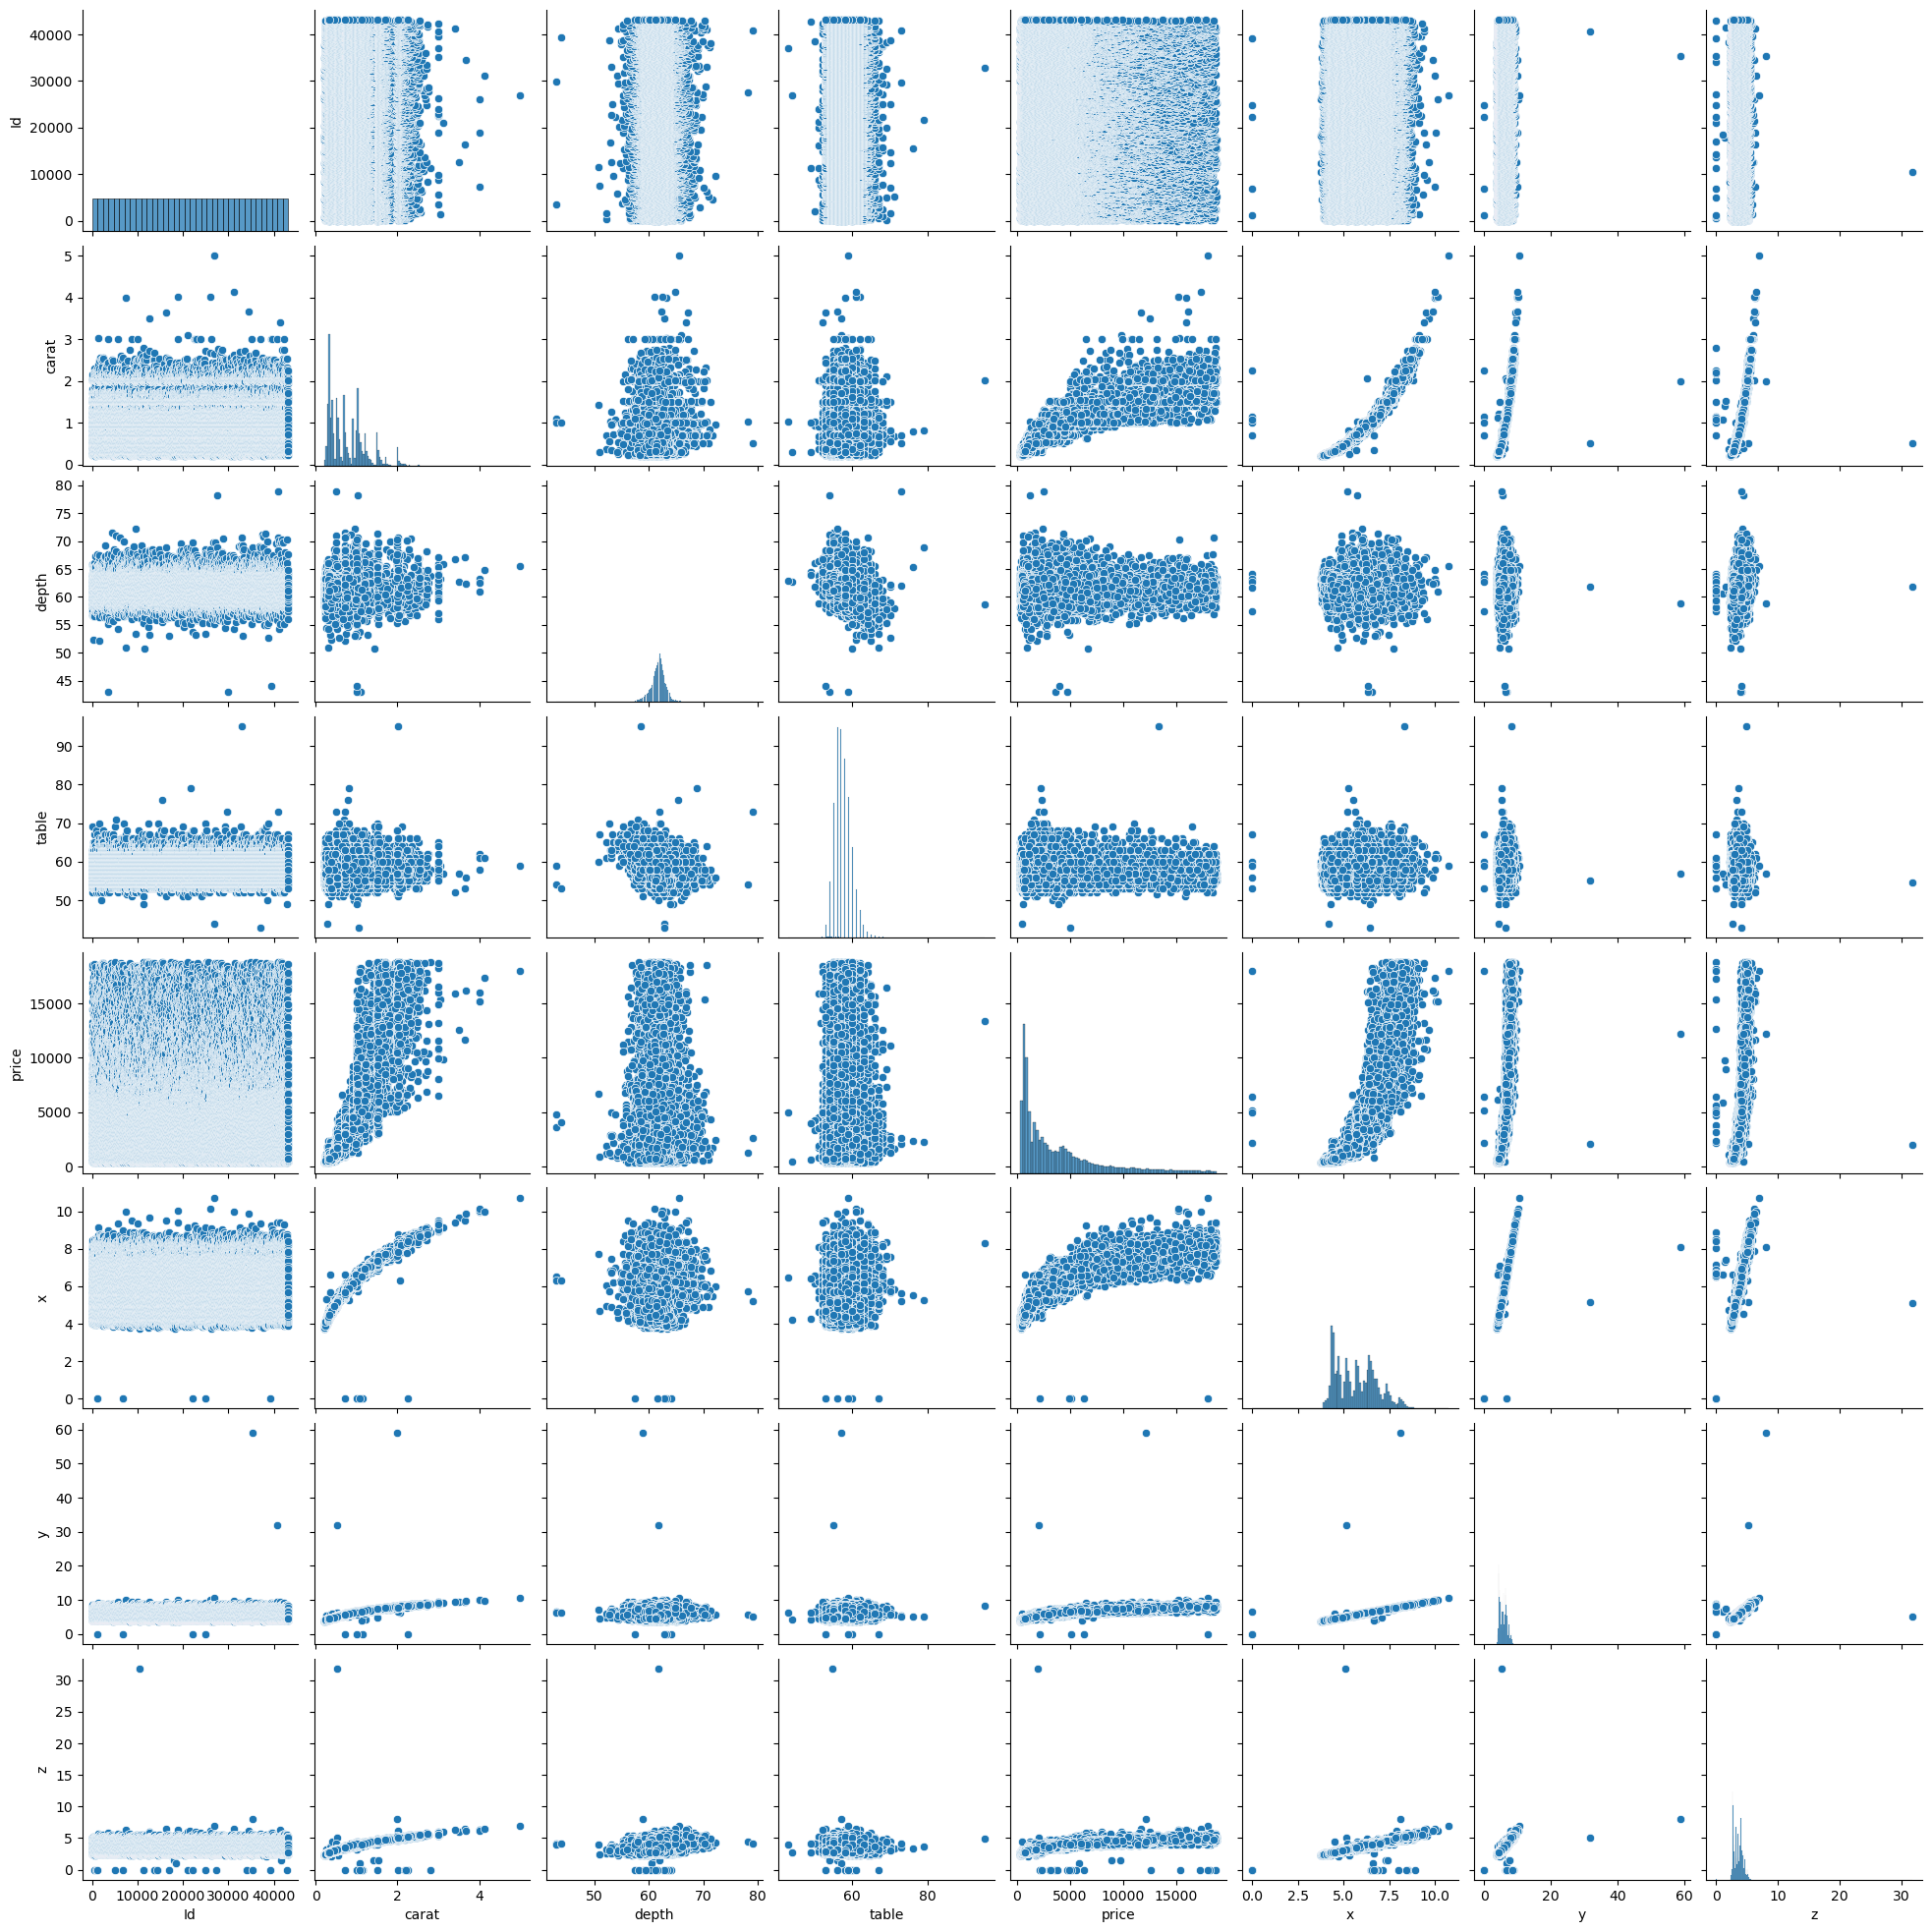

In [58]:
sns.pairplot(df)
plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [60]:
df.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [61]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [63]:
df.corr()

,Id,carat,depth,table,price,x,y,z
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


In [64]:
df['size']=df['x']*df['y']*df['z']
df=df.drop(df[['x','y','z']],axis=1)
df.set_index('Id',inplace=True)

In [66]:
#this function is for encoding categorical columns.
def lencoder (cols) :
    le=LabelEncoder()
    for column in cols :
        df[column]=le.fit_transform(df[column])
        
lencoder(['color','cut','clarity'])
df

,carat,cut,color,clarity,depth,table,price,size
Id,,,,,,,,
1,1.06,2,5,3,61.8,57.0,4270,176.483340
2,1.51,3,3,7,60.9,58.0,15164,246.965796
3,0.32,2,2,5,61.3,56.0,828,52.943373
4,0.53,2,3,5,61.2,56.0,1577,86.422842
5,0.70,3,4,7,61.0,57.0,2596,115.315200
...,...,...,...,...,...,...,...,...
43148,0.52,2,1,5,61.5,56.0,1760,84.997584
43149,0.72,4,0,5,62.1,59.0,3016,115.946550
43150,0.44,3,5,6,61.5,58.0,990,72.801630


In [67]:
df['cut'].value_counts()

2    17203
3    11113
4     9658
1     3881
0     1297
Name: cut, dtype: int64

In [68]:
# this function is to deal with outliere
def hadeling_outliers(df):
    for col in df.columns :
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        clean_df = df[(df[col] > lower_bound) & df[col] < upper_bound]
    return clean_df

In [69]:
clean_df=hadeling_outliers(df)

In [70]:
clean_df

,carat,cut,color,clarity,depth,table,price,size
Id,,,,,,,,
1,1.06,2,5,3,61.8,57.0,4270,176.483340
2,1.51,3,3,7,60.9,58.0,15164,246.965796
3,0.32,2,2,5,61.3,56.0,828,52.943373
4,0.53,2,3,5,61.2,56.0,1577,86.422842
5,0.70,3,4,7,61.0,57.0,2596,115.315200
...,...,...,...,...,...,...,...,...
43148,0.52,2,1,5,61.5,56.0,1760,84.997584
43149,0.72,4,0,5,62.1,59.0,3016,115.946550
43150,0.44,3,5,6,61.5,58.0,990,72.801630


In [104]:
clean_df.corr()

,carat,cut,color,clarity,depth,table,price,size
carat,1.000000,0.019883,0.290530,-0.212793,0.023944,0.182889,0.921911,0.971061
cut,0.019883,1.000000,-0.000008,0.032935,-0.194024,0.157097,0.042280,0.023996
color,0.290530,-0.000008,1.000000,-0.026645,0.045374,0.024920,0.171862,0.281710
clarity,-0.212793,0.032935,-0.026645,1.000000,-0.049417,-0.087256,-0.069404,-0.204043
depth,0.023944,-0.194024,0.045374,-0.049417,1.000000,-0.302794,-0.013137,0.004642
table,0.182889,0.157097,0.024920,-0.087256,-0.302794,1.000000,0.128501,0.167715
price,0.921911,0.042280,0.171862,-0.069404,-0.013137,0.128501,1.000000,0.897903
size,0.971061,0.023996,0.281710,-0.204043,0.004642,0.167715,0.897903,1.000000


In [72]:
clean_df

,carat,cut,color,clarity,depth,table,price,size
Id,,,,,,,,
1,1.06,2,5,3,61.8,57.0,4270,176.483340
2,1.51,3,3,7,60.9,58.0,15164,246.965796
3,0.32,2,2,5,61.3,56.0,828,52.943373
4,0.53,2,3,5,61.2,56.0,1577,86.422842
5,0.70,3,4,7,61.0,57.0,2596,115.315200
...,...,...,...,...,...,...,...,...
43148,0.52,2,1,5,61.5,56.0,1760,84.997584
43149,0.72,4,0,5,62.1,59.0,3016,115.946550
43150,0.44,3,5,6,61.5,58.0,990,72.801630


In [120]:
x=df[['carat','cut','color','clarity']]
y=df[['price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LinearRegression()

In [121]:
model.fit(x_train,y_train)

LinearRegression()

In [130]:
y_pred=model.predict(x_test)

In [123]:
r2=r2_score(y_test,y_pred)
r2

0.8812365669995097

In [128]:
cross = cross_val_score(model, x, y, scoring='r2', cv=KFold(n_splits=5))


In [129]:
cross

array([0.87932393, 0.87743394, 0.87578762, 0.87762332, 0.88027553])

In [134]:
avg_r2 = cross.mean()
avg_r2

0.8780888676971224

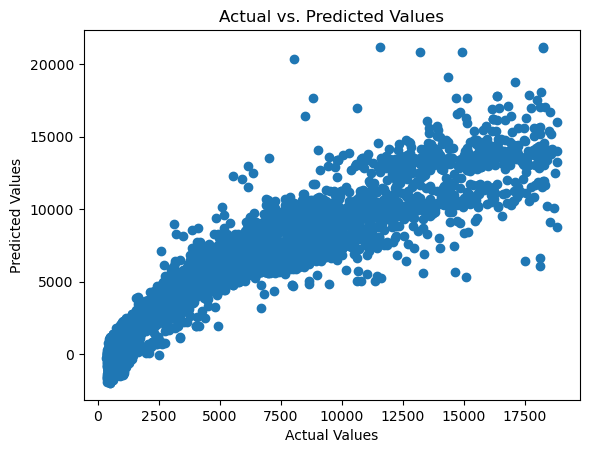

In [142]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

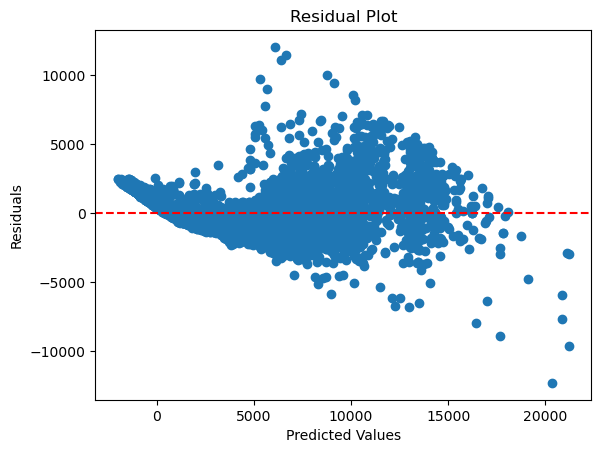

In [144]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()